<a href="https://colab.research.google.com/github/stevansehn/python-single-layer-perceptron/blob/main/single_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Import dataset
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/irisMLP.csv")

y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) # Convert from multiclass to binary
X = df[['sepal.length', 'sepal.width']].values # Train with only two, lineary-separable features

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X) # Normalize the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize weights and bias
n_samples, n_features = X_train.shape
weights = np.zeros(n_features)
bias = 0
learning_rate = 0.1
precision = 0
error_prev = 0
epoch = 1

# Array to store weights for each epoch
weights_history = []

# Training loop
for i in range(1, 20):

  for xi, target in zip(X_train, y_train):
    # Compute the prediction
    linear_output = np.dot(xi, weights) - bias
    prediction = np.sign(linear_output)
    error = target - prediction
    if error != 0:
      # Update weights and bias
      update = learning_rate * error
      weights += update * xi
      bias += update * (-1)

  # Store weights after this epoch
  weights_history.append(weights.copy())

  # Increment epoch count
  epoch += 1

predictions = []

for xi, target in zip(X_test, y_test):
  # Compute the prediction
  linear_output = np.dot(xi, weights) - bias
  prediction = np.sign(linear_output)
  predictions.append(prediction)

predictions_test = np.array(predictions)

test_score = accuracy_score(predictions_test, y_test)

print("Training epochs: ", epoch)
print("Accuracy score: ", test_score)

Training epochs:  20
Accuracy score:  1.0


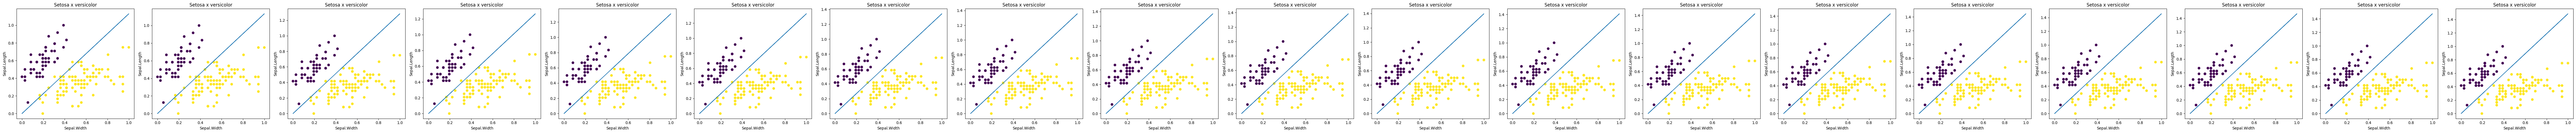

In [19]:
# Plot figures

import matplotlib.pyplot as plt

num_plots = len(weights_history)

fig, axs = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))

for i, arr in enumerate(weights_history):
    x1 = X[:, 0]
    x2 = (-x1 * arr[0]) / arr[1]

    axs[i].plot(x1, x2)
    axs[i].scatter(X[:, 0], X[:, 1], c=y)
    axs[i].set_title('Setosa x versicolor')
    axs[i].set_xlabel('Sepal.Width')
    axs[i].set_ylabel('Sepal.Length')

    # plt.figure()
    # plt.plot(x1, x2)
    # plt.scatter(X[:, 0], X[:, 1], c=y)
    # plt.title('Setosa x versicolor')
    # plt.xlabel('Sepal.Width')
    # plt.ylabel('Sepal.Length')
    # plt.savefig(f'plot_{i}.png')
    # plt.close()

plt.tight_layout()

plt.show()